In [1]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [5]:
# read the csv
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65 
img_name = landmarks_frame.ix[n,0]
print(img_name)
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
print(landmarks.shape)
landmarks = landmarks.reshape(-1,2)
print(landmarks.shape)


person-7.jpg
(136,)
(68, 2)


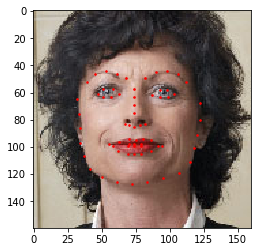

In [4]:
def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:,0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
              landmarks)
plt.show()

0 (324, 215, 3) (68, 2)
1 (500, 333, 3) (68, 2)
2 (250, 258, 3) (68, 2)
3 (434, 290, 3) (68, 2)


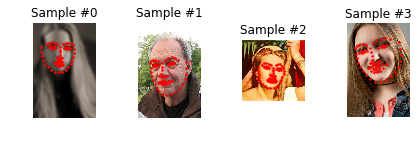

In [7]:
# define dataset class
class FaceLandmarksDataset(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.landmarks_frame)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image' : image, 'landmarks': landmarks}
        
        if self.transform:
            sample = self.transform(sample)
        return sample

face_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
                                   root_dir='faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]
    
    print(i, sample['image'].shape, sample['landmarks'].shape)
    ax = plt.subplot(1, 4, i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    
    if i == 3:
        plt.show()
        break

In [8]:
dataloader = DataLoader(face_dataset, batch_size=4,
                       shuffle=True, num_workers=4)